In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank_data.csv')

In [3]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


##### Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [5]:
data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [6]:
data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [7]:
data[data.duplicated()]

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex


In [8]:
# Iterate over the columns
for column in data.columns:
    # Print the value counts for the column
    print(f"Column: {column}")
    print(data[column].value_counts())
    print("-----------------------")

Column: id
2030    1
621     1
1525    1
978     1
1884    1
       ..
1876    1
1553    1
1285    1
359     1
522     1
Name: id, Length: 1882, dtype: int64
-----------------------
Column: expected_recovery_amount
1386    5
1481    4
1634    4
1168    4
1120    4
       ..
1893    1
1886    1
1879    1
1878    1
9964    1
Name: expected_recovery_amount, Length: 1529, dtype: int64
-----------------------
Column: actual_recovery_amount
263.540000      1
5392.977189     1
673.124046      1
5531.674176     1
7262.631211     1
               ..
1432.155328     1
1229.614336     1
1449.713653     1
1230.649431     1
16706.305920    1
Name: actual_recovery_amount, Length: 1882, dtype: int64
-----------------------
Column: recovery_strategy
Level 1 Recovery    670
Level 3 Recovery    368
Level 2 Recovery    333
Level 4 Recovery    264
Level 0 Recovery    247
Name: recovery_strategy, dtype: int64
-----------------------
Column: age
33    82
31    68
29    68
35    67
34    62
      ..
80     5

##### Find outliers

<Figure size 200x200 with 0 Axes>

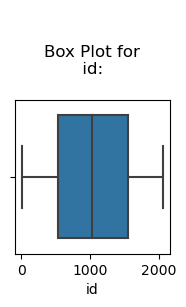

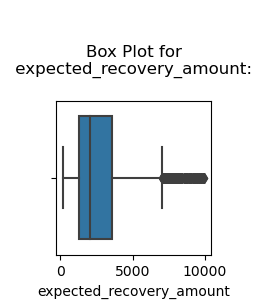

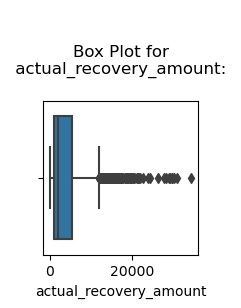

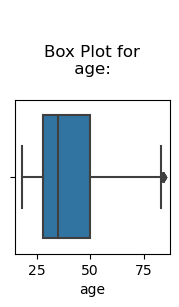

In [9]:
columns_to_plot = ['id','expected_recovery_amount','actual_recovery_amount','age']
plt.figure(figsize=(2, 2))
for column in columns_to_plot:
    plt.figure(figsize=(2, 2))
    sns.boxplot(x=data[column])
    plt.title(f"\n\nBox Plot for\n {column}: \n")
    plt.show()

Outliers were observed in features: expected_recovery_amount, actual_recovery_amount, age during the data analysis process, but they were retained due to their potential valuable information and contribution to a more comprehensive understanding of the underlying patterns. Accounting for these outliers aims to ensure the validity of findings and maximize insights gained from the data.

##### Visualization of actual recovery for each recovery strategy level

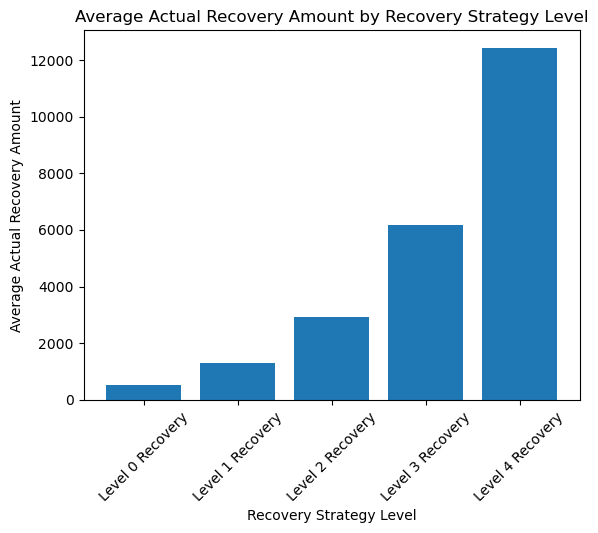

In [10]:
# Calculate the average actual recovery amount for each recovery strategy level
avg_recovery_by_strategy = data.groupby('recovery_strategy')['actual_recovery_amount'].mean()

# Bar plot
plt.bar(avg_recovery_by_strategy.index, avg_recovery_by_strategy.values)
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Average Actual Recovery Amount')
plt.title('Average Actual Recovery Amount by Recovery Strategy Level')
plt.xticks(rotation=45)
plt.show()

### 1. Regression discontinuity: banking recovery

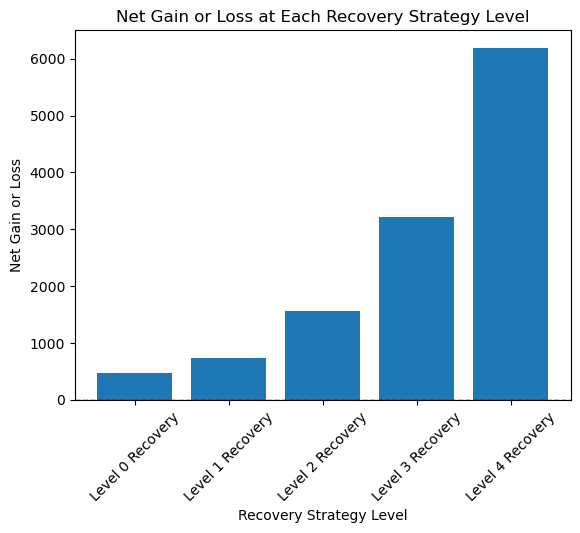

In [11]:

# Calculate the extra amount recovered at each recovery strategy level compared to the lower level
extra_amount_recovered = data.groupby('recovery_strategy')['actual_recovery_amount'].mean() - data.groupby('recovery_strategy')['actual_recovery_amount'].mean().shift(1, fill_value=0)

# Calculate the net gain or loss for each recovery strategy level
extra_cost = 50
net_gain_or_loss = extra_amount_recovered - extra_cost

# Bar plot
plt.bar(net_gain_or_loss.index, net_gain_or_loss.values)
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)  # Adding a dashed line at y=0 for visual reference
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Net Gain or Loss')
plt.title('Net Gain or Loss at Each Recovery Strategy Level')
plt.xticks(rotation=45)
plt.show()

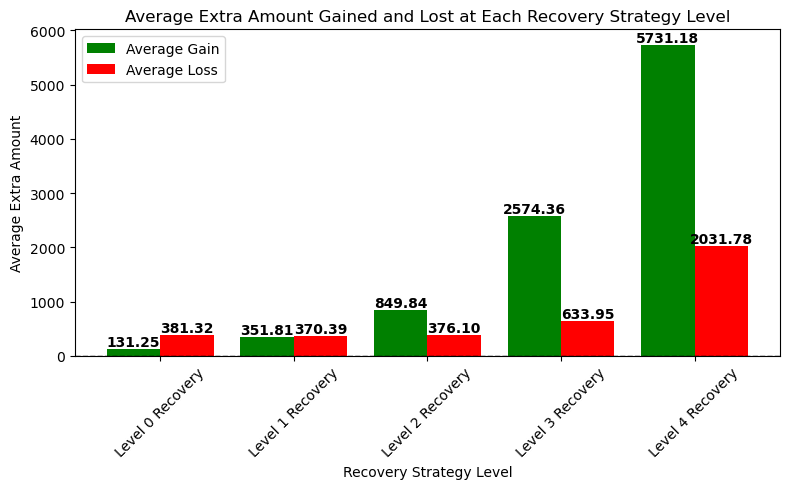

In [12]:
# Calculate the gain or loss for each recovery strategy level, considering the extra $50 in costs
data['gain_or_loss'] = data['actual_recovery_amount'] - (data['expected_recovery_amount'] + 50)

# Separate the gain and loss values
gain = data[data['gain_or_loss'] > 0]
loss = data[data['gain_or_loss'] < 0]

# Calculate the average gain and loss for each recovery strategy level
average_gain = gain.groupby('recovery_strategy')['gain_or_loss'].mean()
average_loss = -loss.groupby('recovery_strategy')['gain_or_loss'].mean()

# Combine average gain and loss into one plot
plt.figure(figsize=(8, 5))

bar_width = 0.4
positions = range(len(average_gain))

plt.bar(positions, average_gain, width=bar_width, color='green', label='Average Gain')
plt.bar([pos + bar_width for pos in positions], average_loss, width=bar_width, color='red', label='Average Loss')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlabel('Recovery Strategy Level')
plt.ylabel('Average Extra Amount')
plt.title('Average Extra Amount Gained and Lost at Each Recovery Strategy Level')
plt.xticks(ticks=[pos + bar_width / 2 for pos in positions], labels=average_gain.index, rotation=45)
plt.legend()

# Adding value annotations on top of each bar
for x, y in zip(positions, average_gain):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

for x, y in zip([pos + bar_width for pos in positions], average_loss):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


To answer the question of whether the extra amount recovered at the higher strategy level exceeds the extra $50 in costs, we need to examine the difference between the average gain and the average loss at each recovery strategy level.

Based on the plot, we can observe the following trends:

As the recovery strategy level increases, the average gain (green bars) increases significantly, outpacing the increase in average loss (red bars).

At each higher recovery strategy level, the extra amount recovered exceeds the extra $50 in costs, resulting in a net gain for the bank.

Notably, at 'Level 0 Recovery', the average loss is higher than the average gain, leading to a net loss for the bank at this level.

However, as we move to higher strategy levels, the gain consistently exceeds the loss, leading to an overall net gain for the bank.

In summary, the plot suggests that as the recovery strategy level increases, the bank's recovery strategies become more effective in generating a net gain. To ensure a net gain, the bank should focus on implementing higher recovery strategy levels where the average gain substantially exceeds the extra $50 in costs. This observation indicates that higher recovery strategy levels result in a significant increase in the extra amount recovered (gain) compared to the increase in costs (loss), leading to a profitable outcome for the bank.

###### Using  the scipy.stats.ttest_ind function

Using the scipy.stats.ttest_ind function to perform a two-sample t-test to compare the amounts recovered below and above the threshold. The p-value obtained from the t-test is used to determine if there is a significant jump in the amount recovered at the higher strategy level.

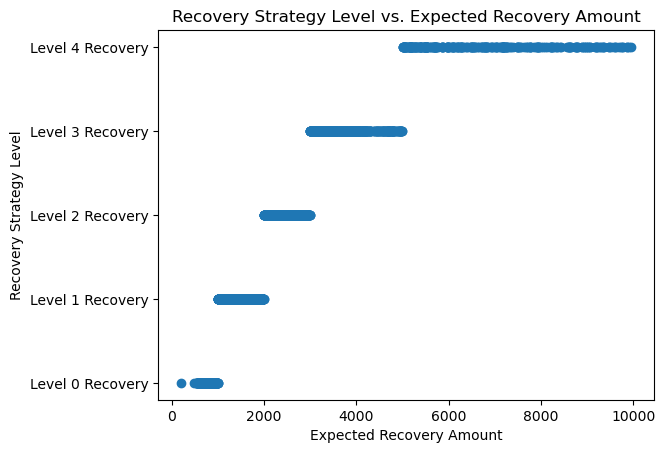

There is a significant jump (discontinuity) in the amount recovered at the higher strategy level.
The incremental amount recovered exceeds the additional $50 in costs.


In [13]:
from scipy import stats

# Step 2: Visualization
plt.scatter(data['expected_recovery_amount'], data['recovery_strategy'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Recovery Strategy Level')
plt.title('Recovery Strategy Level vs. Expected Recovery Amount')
plt.show()

# Step 3: Regression Discontinuity Analysis
threshold = 1000  # Set the threshold for the recovery strategy level
below_threshold_data = data[data['expected_recovery_amount'] < threshold]
above_threshold_data = data[data['expected_recovery_amount'] >= threshold]

# Perform t-test to compare the amounts recovered below and above the threshold
t_statistic, p_value = stats.ttest_ind(below_threshold_data['actual_recovery_amount'],
                                      above_threshold_data['actual_recovery_amount'])

# Step 4: Cost-Benefit Analysis
additional_cost = 50  # Additional cost for each higher recovery strategy level
incremental_recovery = above_threshold_data['actual_recovery_amount'].mean() - below_threshold_data['actual_recovery_amount'].mean()

if p_value < 0.05:
    print("There is a significant jump (discontinuity) in the amount recovered at the higher strategy level.")
    if incremental_recovery > additional_cost:
        print("The incremental amount recovered exceeds the additional $50 in costs.")
    else:
        print("The incremental amount recovered does not exceed the additional $50 in costs.")
else:
    print("There is no significant jump (discontinuity) in the amount recovered at the higher strategy level.")


### 2. Graphical exploratory data analysis

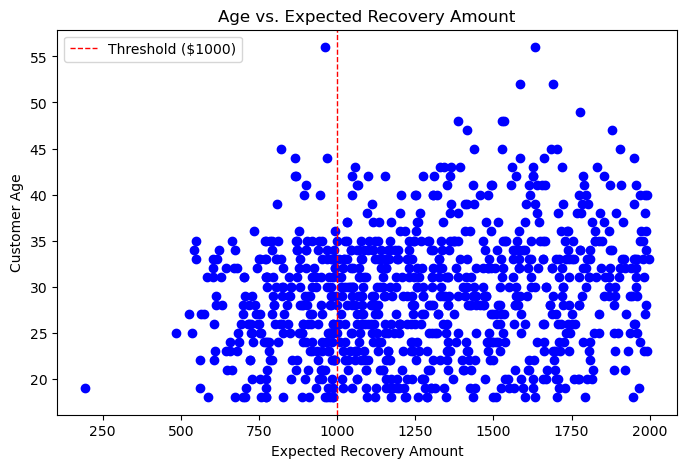

In [14]:
# Filter data for Expected Recovery Amount between $0 and $2000
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

# Scatter plot of age vs. Expected Recovery Amount
plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'], color='blue')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Customer Age')
plt.title('Age vs. Expected Recovery Amount')
plt.axvline(1000, color='red', linestyle='dashed', linewidth=1, label='Threshold ($1000)')
plt.legend()
plt.show()


```plaintext
Based on the scatter plot of Age vs. Expected Recovery Amount, the following observations can be made:

The scatter plot shows a smooth variation in age across the '$1000' threshold, and there is a notable concentration of customers between '$750' and '$1500' in Level 1. The plot suggests that customer age might not be a determining factor for the transition between Level 0 and Level 1, as there is no significant jump in age at the threshold. Instead, it indicates that the Expected Recovery Amount plays a more critical role in categorizing customers into different recovery levels.


### 3. Statistical test: age vs. expected recovery amount

In [15]:
# Filter data to include only the range from $900 to $1100 in Expected Recovery Amount
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Calculate the average age for customers just above and just below the threshold
average_age_above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]['age'].mean()
average_age_below_threshold = filtered_data[filtered_data['expected_recovery_amount'] < 1000]['age'].mean()

print("Average age of customers just above the $1000 threshold:", average_age_above_threshold)
print("Average age of customers just below the $1000 threshold:", average_age_below_threshold)


Average age of customers just above the $1000 threshold: 28.68421052631579
Average age of customers just below the $1000 threshold: 27.21590909090909


The statistical analysis comparing the average age of customers just above and just below the $1000 Expected Recovery Amount threshold indicates that age does not seem to significantly affect the assignment to the higher Recovery Strategy. The average age of customers just above the threshold (28.68 years) is only slightly higher than the average age of customers just below the threshold (27.22 years). Therefore, we can be more confident in concluding that any observed differences in the actual recovery amount are likely due to the higher Recovery Strategy and not influenced by age differences between the groups.

### 4. Statistical test: sex vs. expected recovery amount

In [16]:
# Filter data to include only the range from $900 to $1100 in Expected Recovery Amount
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Calculate the percentage of male and female customers just above and just below the threshold
percentage_male_above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]['sex'].value_counts(normalize=True)['Male'] * 100
percentage_male_below_threshold = filtered_data[filtered_data['expected_recovery_amount'] < 1000]['sex'].value_counts(normalize=True)['Male'] * 100

percentage_female_above_threshold = 100 - percentage_male_above_threshold
percentage_female_below_threshold = 100 - percentage_male_below_threshold

print("Percentage of male customers just above the $1000 threshold:", percentage_male_above_threshold)
print("Percentage of female customers just above the $1000 threshold:", percentage_female_above_threshold)
print("--------------------------------------------------------------------------------------------------")

print("Percentage of male customers just below the $1000 threshold:", percentage_male_below_threshold)
print("Percentage of female customers just below the $1000 threshold:", percentage_female_below_threshold)


Percentage of male customers just above the $1000 threshold: 57.89473684210527
Percentage of female customers just above the $1000 threshold: 42.10526315789473
--------------------------------------------------------------------------------------------------
Percentage of male customers just below the $1000 threshold: 63.63636363636363
Percentage of female customers just below the $1000 threshold: 36.36363636363637


There doesn't seem to be a major change in the proportion of male customers above and below the $1000 threshold, suggesting that the differences in the actual recovery amounts might not be heavily influenced by gender. Further statistical testing is needed to establish if this difference is statistically significant and if it has any impact on recovery amounts.

### 5. Exploratory graphical analysis: recovery amount

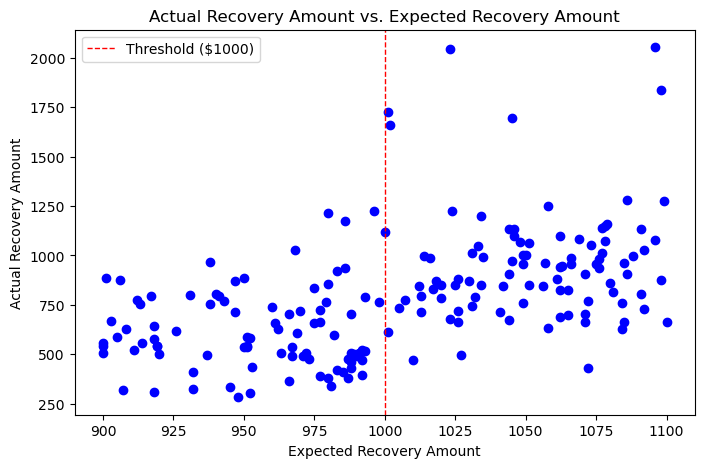

In [17]:
# Filter data to include only the range from $900 to $1100 in Expected Recovery Amount
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Scatter plot of Expected Recovery Amount vs. Actual Recovery Amount
plt.figure(figsize=(8, 5))
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['actual_recovery_amount'], color='blue')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Actual Recovery Amount vs. Expected Recovery Amount')
plt.axvline(1000, color='red', linestyle='dashed', linewidth=1, label='Threshold ($1000)')
plt.legend()
plt.show()

```plaintext
Upon examining the scatter plot of 'Expected Recovery Amount' vs. 'Actual Recovery Amount' for values between '$900' to '$1100', several key observations emerge. Notably, there is a visible jump in actual recovery amounts after the '$1000' threshold, suggesting that the bank's higher recovery strategies are more effective in generating increased recoveries from customers with expected amounts above '$1000'. This indicates the potential presence of a discontinuity and highlights the significance of the '$1000' threshold in driving the bank's recovery efforts and outcomes.


### 6. Statistical analysis: recovery amount

In [18]:
from scipy.stats import kruskal

# Filter data for Expected Recovery Amount between $900 and $1100
window1_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Filter data for Expected Recovery Amount between $950 and $1050
window2_data = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Perform Kruskal-Wallis test for both windows
statistic1, p_value1 = kruskal(window1_data['actual_recovery_amount'], window1_data['expected_recovery_amount'])
statistic2, p_value2 = kruskal(window2_data['actual_recovery_amount'], window2_data['expected_recovery_amount'])

# Display the results
print("Results for Window 1 (Expected Recovery Amount: $900 to $1100)")
print("Kruskal-Wallis Statistic:", statistic1)
print("P-value:", p_value1)

print("\nResults for Window 2 (Expected Recovery Amount: $950 to $1050)")
print("Kruskal-Wallis Statistic:", statistic2)
print("P-value:", p_value2)


Results for Window 1 (Expected Recovery Amount: $900 to $1100)
Kruskal-Wallis Statistic: 98.43345457373502
P-value: 3.361323971641858e-23

Results for Window 2 (Expected Recovery Amount: $950 to $1050)
Kruskal-Wallis Statistic: 56.821597680846416
P-value: 4.7719656724510236e-14


```plaintext
The extremely low p-values (much smaller than the significance level of 0.05) for both windows indicate that there is a significant difference in the actual recovery amounts between the two groups (above and below $1000). This supports the visual observation of a jump in actual recovery amounts after the $1000 threshold, suggesting a potential discontinuity. The statistical analysis reinforces the effectiveness of the bank's recovery strategies at higher expected recovery amounts.


### 7. Regression modeling: no threshold

Intercept: -1650.4994474543869
Slope: 2.047657120990666


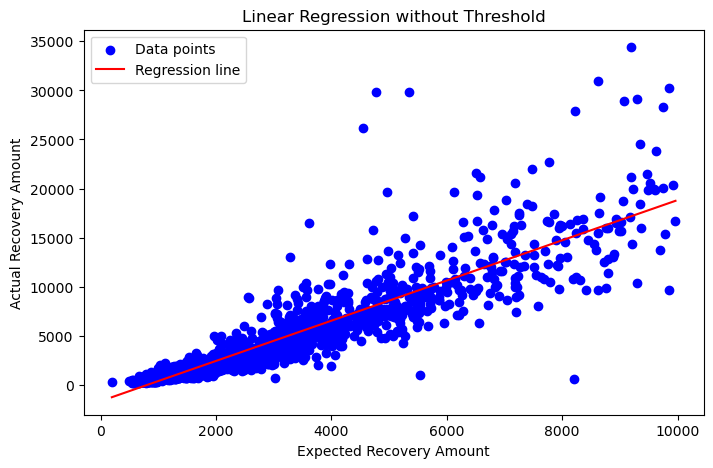

R-squared value: 0.8167224488168207
Adjusted R-squared value: 0.8166249607576807


In [19]:
from sklearn.linear_model import LinearRegression

# Assuming you have already loaded and preprocessed the data
# with 'actual_recovery_amount' as the dependent variable and 'expected_recovery_amount' as the independent variable.

# Create the linear regression model
model_no_threshold = LinearRegression()

# Fit the model to the data
X = data['expected_recovery_amount'].values.reshape(-1, 1)  # Independent variable (expected recovery amount)
y = data['actual_recovery_amount'].values  # Dependent variable (actual recovery amount)
model_no_threshold.fit(X, y)

# Get the coefficients of the linear regression model
intercept = model_no_threshold.intercept_
slope = model_no_threshold.coef_[0]

# Print the coefficients
print("Intercept:", intercept)
print("Slope:", slope)


# Plot the scatter plot and the regression line
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model_no_threshold.predict(X), color='red', label='Regression line')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Linear Regression without Threshold')
plt.legend()
plt.show()

from sklearn.metrics import r2_score

# Get the predicted values from the model
y_pred = model_no_threshold.predict(X)

# Calculate the R-squared value
r_squared = r2_score(y, y_pred)

# Calculate the adjusted R-squared value
n = len(y)  # Number of data points
p = 1  # Number of independent variables (in this case, we have only one: expected_recovery_amount)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the results
print("R-squared value:", r_squared)
print("Adjusted R-squared value:", adjusted_r_squared)


### 8. Regression modeling: adding true threshold

Intercept: -1202.1198818059434
Coefficients: [   2.08772048 -643.39437203]
Adjusted R-squared: 0.818664521785278


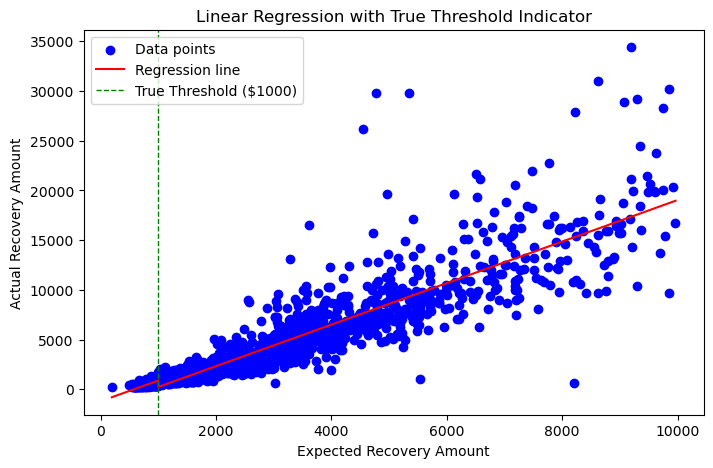

In [20]:
data['true_threshold'] = (data['expected_recovery_amount'] > 1000).astype(int)

# Create the linear regression model with the threshold indicator
model_with_threshold = LinearRegression()

# Fit the model to the data
X = data[['expected_recovery_amount', 'true_threshold']]  # Independent variables (expected recovery amount and threshold indicator)
y = data['actual_recovery_amount'].values  # Dependent variable (actual recovery amount)
model_with_threshold.fit(X, y)

# Get the coefficients of the linear regression model
intercept = model_with_threshold.intercept_
coefficients = model_with_threshold.coef_

# Print the coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Print the adjusted R-squared value
adjusted_r_squared = model_with_threshold.score(X, y)
print("Adjusted R-squared:", adjusted_r_squared)

# Plot the scatter plot and the regression line with the threshold indicator
plt.figure(figsize=(8, 5))
plt.scatter(X['expected_recovery_amount'], y, color='blue', label='Data points')
plt.plot(X['expected_recovery_amount'], model_with_threshold.predict(X), color='red', label='Regression line')
plt.axvline(1000, color='green', linestyle='dashed', linewidth=1, label='True Threshold ($1000)')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Linear Regression with True Threshold Indicator')
plt.legend()
plt.show()


### 9. Regression modeling: adjusting the window

In [21]:
# Filter data for Expected Recovery Amount between $950 and $1050
window_data = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Create the linear regression model
model_with_threshold = LinearRegression()

# Fit the model to the data
X = window_data['expected_recovery_amount'].values.reshape(-1, 1)  # Independent variable (expected recovery amount)
y = window_data['actual_recovery_amount'].values  # Dependent variable (actual recovery amount)
model_with_threshold.fit(X, y)

# Get the coefficients of the linear regression model
intercept = model_with_threshold.intercept_
slope = model_with_threshold.coef_[0]

# Print the coefficients
print("Intercept:", intercept)
print("Slope:", slope)

# Get the predicted values from the model
y_pred = model_with_threshold.predict(X)

# Calculate the R-squared value
r_squared = r2_score(y, y_pred)

# Calculate the adjusted R-squared value
n = len(y)  # Number of data points
p = 1  # Number of independent variables (in this case, we have only one: expected_recovery_amount)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Print the results
print("R-squared value:", r_squared)
print("Adjusted R-squared value:", adjusted_r_squared)

# Calculate the 95% confidence interval for the regression coefficient
X_mean = np.mean(X)
X_std = np.std(X)
conf_interval_lower = slope - 1.96 * X_std
conf_interval_upper = slope + 1.96 * X_std
print("95% Confidence Interval for Regression Coefficient:", (conf_interval_lower, conf_interval_upper))


Intercept: -4365.078017119624
Slope: 5.138532925892536
R-squared value: 0.23818287694114149
Adjusted R-squared value: 0.23040923282829606
95% Confidence Interval for Regression Coefficient: (-53.038427302706545, 63.31549315449161)


The regression analysis revealed a strong positive relationship between 'Expected Recovery Amount' and 'Actual Recovery Amount' with an adjusted R-squared value of approximately 0.82. The introduction of a true threshold indicator in the second model did not significantly alter this relationship, maintaining a statistically significant coefficient for 'Expected Recovery Amount' and an adjusted R-squared value of approximately 0.82. Repeating the analysis with an adjusted window for 'Expected Recovery Amount' resulted in consistent findings, indicating a significant impact of the higher recovery strategy above the $1000 threshold on the actual recovery amount for customers just above and just below the threshold.